**Task Description:**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.


* Use R or Python or perform this task
* Dataset : https://bit.ly/3kXTdox
* Sample Solution : https://bit.ly/3cGyP8j





In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

Loading the Data set

In [6]:
data =  pd.read_csv("https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-",index_col="Id")
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [7]:
data.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
141,6.7,3.1,5.6,2.4,Iris-virginica
142,6.9,3.1,5.1,2.3,Iris-virginica
143,5.8,2.7,5.1,1.9,Iris-virginica
144,6.8,3.2,5.9,2.3,Iris-virginica
145,6.7,3.3,5.7,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


Getting more information from the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for nulls in tha data frame

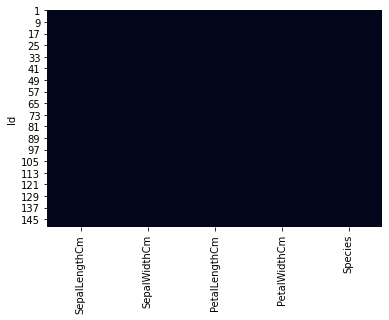

In [10]:
sns.heatmap(data.isnull(),cbar=False)

There were no nulls found, hence no imputation is required !

Using Pairplot to get the most out of Data

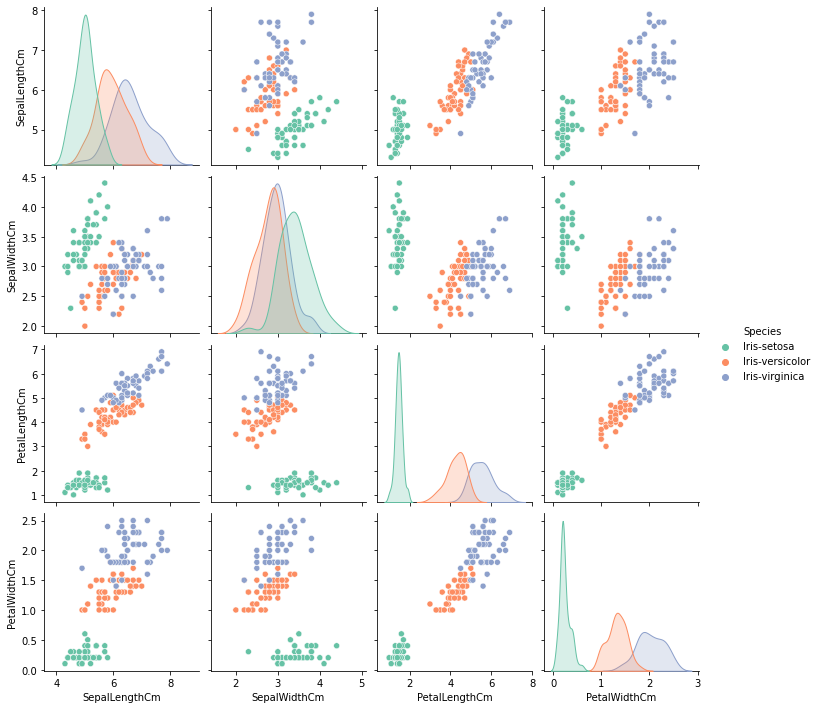

In [11]:
sns.pairplot(data=data,hue="Species",palette="Set2")
plt.show()

As observed from the above pair plot, Iris-setosa can easily be separated from other two !!

The feature observed to have the most clear outcomes is **PetalLength** & **PetalWidth**. We can use these features to process our clustering

In [12]:
# To be used later for handy plotting
species = {0:"Iris-setosa",2:"Iris-virginica",1:"Iris-versicolor"}

Testing for different number of Cluster from 1 to 20

In [13]:
Nc = list(range(1, 20))
kmeans = [KMeans(n_clusters=i,init='k-means++').fit(data.drop('Species',axis=1)) for i in Nc]
inertia = [i.inertia_ for i in kmeans]
inertia

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.1774809983897,
 34.18920546865627,
 29.955568877177576,
 28.16742514503041,
 26.09716148325359,
 24.61883333333334,
 22.912364833652763,
 21.435977244977245,
 20.9748001998002,
 19.046491702741704,
 18.360077533577535,
 16.76473298107122,
 16.602586919616332,
 15.664005411255413]

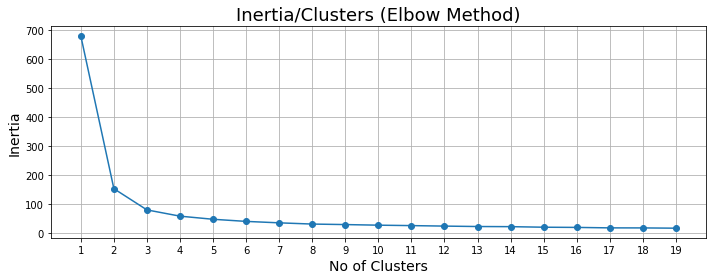

In [14]:
plt.figure(figsize=(10,4))
plt.title("Inertia/Clusters (Elbow Method)", fontsize=18)
plt.plot(Nc,inertia,"-o")
plt.grid(True)
plt.xlabel("No of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

After determining the value of **K** using **Elbow method**,we can plot close values of K with respect to original dataset inorder to determine the most accurate cluster. 

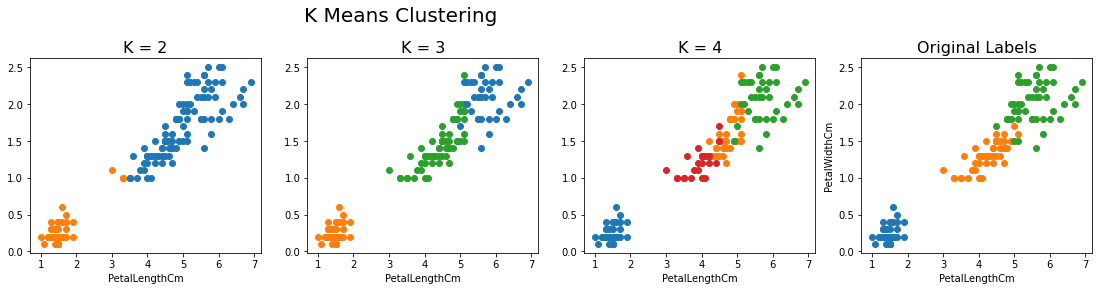

In [15]:
features = data.drop("Species",axis=1)

plt.figure(figsize=(24,4))
plt.suptitle("K Means Clustering",fontsize=20)

# Plotting for K values from 2 to 4
for k in range(2,5):
    plt.subplot(1,5,k)
    plt.title(f"K = {k}",fontsize=16)
    plt.xlabel("PetalLengthCm")
    features["labels"] = KMeans(n_clusters=k).fit_predict(features)
    [plt.scatter(features.PetalLengthCm[features.labels == i],features.PetalWidthCm[features.labels == i]) for i in range(k)]


# Plotting original data set
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
for i in range(3):
    plt.scatter(data.PetalLengthCm[data.Species == species[i]],data.PetalWidthCm[data.Species == species[i]])

plt.subplots_adjust(top=0.8)
plt.show()

As observed from the plotting the most accurate clustering occurs when k =3, which is almost identical to the original dataset.

Moving towards to final clustering, when **k = 3**. Along with centroids for each Cluster

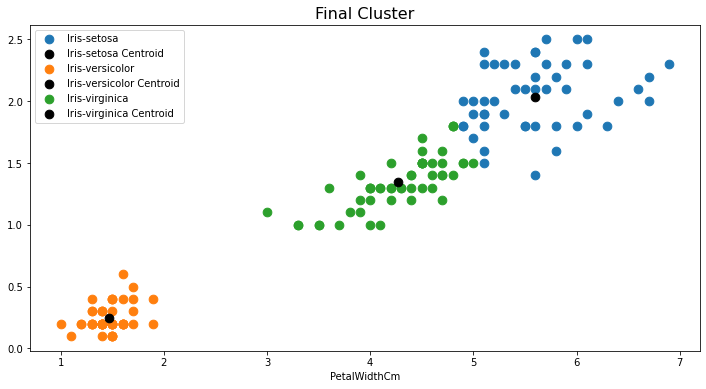

In [16]:
plt.figure(figsize=(12,6))
plt.title("Final Cluster",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.xlabel("PetalWidthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features[['PetalLengthCm','PetalWidthCm']])
cetroids = kmeans.cluster_centers_
for i in range(3):
    plt.scatter(features.PetalLengthCm[features.labels == i],features.PetalWidthCm[features.labels == i],s = 75, label = species[i])
    plt.scatter(cetroids[i,0],cetroids[i,1],label= f"{species[i]} Centroid",c='black',s = 75)
plt.legend()
plt.show()